<a href="https://colab.research.google.com/github/anthonybrown0528/csc-442-course-project/blob/main/notebook/hw6/genre_description_score_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Dataset

In [2]:
filepath = 'https://raw.githubusercontent.com/anthonybrown0528/csc-442-course-project/refs/heads/main/dataset/clean/hw6/netflix_film_imdb_scores_cleaned_descriptions_df.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,title,description_x,release_year,runtime,imdb_id,imdb_score,imdb_votes,show_id,type,director,...,country,date_added,age_certification,num_releases,listed_in,description_y,num_listed_in,first_cast,cast_freq_mean,genre_freq_mean
0,Monty Python and the Holy Grail,King Arthur accompany squire recruit Knights R...,1975,91,tt0071853,8.2,530877,s4218,Movie,"Terry Gilliam, Terry Jones",...,United Kingdom,"January 2, 2019",PG,1,"Action & Adventure, Classic Movies, Comedies",The Monty Python comedy clan skewers King Arth...,3,Graham Chapman,10.888889,831.000000
1,My Fair Lady,snobbish phonetics professor agree wager take ...,1964,170,tt0058385,7.8,94121,s1127,Movie,George Cukor,...,United States,"April 1, 2021",G,1,"Classic Movies, Music & Musicals",When a Cockney flower girl takes elocution les...,2,Audrey Hepburn,1.083333,203.500000
2,The Blue Lagoon,Two small child ship cook survive shipwreck fi...,1980,104,tt0080453,5.8,69053,s176,Movie,Randal Kleiser,...,United States,"September 1, 2021",R,1,"Dramas, Romantic Movies","Two shipwrecked children, stranded for years o...",2,Brooke Shields,1.375000,1446.500000
3,Bonnie and Clyde,In 1930s bore waitress Bonnie Parker fall love...,1967,110,tt0061418,7.7,111189,s6359,Movie,Arthur Penn,...,United States,"January 1, 2021",R,1,"Action & Adventure, Classic Movies, Dramas","Bonnie Parker and Clyde Barrow are young, in l...",3,Warren Beatty,1.777778,1076.333333
4,The Guns of Navarone,team allied saboteur assign impossible mission...,1961,158,tt0054953,7.5,50150,s178,Movie,J. Lee Thompson,...,"United Kingdom, United States","September 1, 2021",TV-14,1,"Action & Adventure, Classic Movies","During World War II, British forces launch an ...",2,Gregory Peck,1.300000,459.500000


# Retrieve a column subset of the merged dataset

In [4]:
column_subset = ['title', 'release_year', 'listed_in', 'description_x', 'imdb_score']
query_df = df[column_subset]

query_df

,title,release_year,listed_in,description_x,imdb_score
0,Monty Python and the Holy Grail,1975,"Action & Adventure, Classic Movies, Comedies",King Arthur accompany squire recruit Knights R...,8.2
1,My Fair Lady,1964,"Classic Movies, Music & Musicals",snobbish phonetics professor agree wager take ...,7.8
2,The Blue Lagoon,1980,"Dramas, Romantic Movies",Two small child ship cook survive shipwreck fi...,5.8
3,Bonnie and Clyde,1967,"Action & Adventure, Classic Movies, Dramas",In 1930s bore waitress Bonnie Parker fall love...,7.7
4,The Guns of Navarone,1961,"Action & Adventure, Classic Movies",team allied saboteur assign impossible mission...,7.5
...,...,...,...,...,...
2472,Myriam Fares: The Journey,2021,"Documentaries, International Movies, Music & M...",From pregnancy album preparation Lebanese sing...,2.3
2473,The Tambour of Retribution,2021,"Dramas, International Movies, Romantic Movies",son swordsman fall love daughter Tagaga social...,6.9
2474,Pitta Kathalu,2021,"International TV Shows, TV Dramas",Four different woman four journey love betraya...,5.1
2475,Loyiso Gola: Unlearning,2021,Stand-Up Comedy,South African comedian Loyiso Gola serve filte...,5.9


In [5]:
features = ['title', 'release_year', 'listed_in', 'description_x']

feature_df = query_df[features]
target_df = query_df['imdb_score']

# Split the data into a training and test set

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.3, random_state=42)

# Construct a Dataframe to model the genres of each movie

In [8]:
movie_genre_map = {
    'title': [],
    'release_year': [],
    'genre': []
}

for _, row in X_train.iterrows():
  genres = row['listed_in'].split(',')

  for genre in genres:
    movie_genre_map['title'].append(row['title'])
    movie_genre_map['release_year'].append(row['release_year'])
    movie_genre_map['genre'].append(genre.strip())

In [9]:
movie_genre_df = pd.DataFrame(movie_genre_map)
movie_genre_df

,title,release_year,genre
0,Bogda,2018,Dramas
1,Bogda,2018,International Movies
2,Frequency,2016,Crime TV Shows
3,Frequency,2016,TV Dramas
4,Frequency,2016,TV Mysteries
...,...,...,...
3934,Nappily Ever After,2018,Romantic Movies
3935,Cities of Last Things,2018,Dramas
3936,Cities of Last Things,2018,Independent Movies
3937,Cities of Last Things,2018,International Movies


# Find the co-occurrence of genres in the dataset

In [10]:
genre_co_occurrence_df = pd.merge(movie_genre_df, movie_genre_df, how='inner', on=['title', 'release_year'])
genre_co_occurrence_group = genre_co_occurrence_df.groupby(by=['genre_x', 'genre_y'], as_index=False)

In [11]:
genre_co_occurrence_counts = genre_co_occurrence_group.count()



genre_co_occurrence_counts

,genre_x,genre_y,title,release_year
0,Action & Adventure,Action & Adventure,184,184
1,Action & Adventure,Anime Features,4,4
2,Action & Adventure,Children & Family Movies,5,5
3,Action & Adventure,Classic Movies,3,3
4,Action & Adventure,Comedies,44,44
...,...,...,...,...
424,Thrillers,Independent Movies,9,9
425,Thrillers,International Movies,99,99
426,Thrillers,Romantic Movies,2,2
427,Thrillers,Sci-Fi & Fantasy,12,12


# Find the number of movies listed as part of each genre

In [12]:
genre_group = movie_genre_df.groupby(by='genre')

In [13]:
genre_counts_df = genre_group.count().drop(columns=['release_year']).rename(columns={'title': 'count'})
genre_counts_df

,count
genre,
Action & Adventure,182
Anime Features,7
Anime Series,31
British TV Shows,26
Children & Family Movies,105
Classic Movies,9
Comedies,386
Crime TV Shows,76
Cult Movies,4


<Axes: title={'center': 'Genre Counts'}, ylabel='genre'>

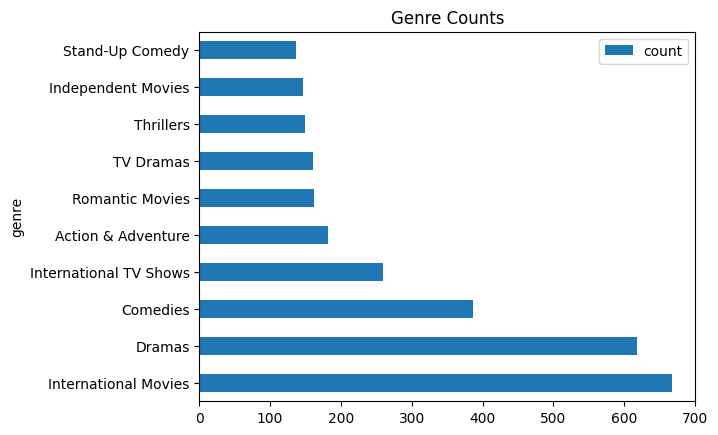

In [14]:
genre_counts_sorted_df = genre_counts_df.sort_values(by='count', ascending=False)
most_frequent_genres_df = genre_counts_sorted_df.iloc[:10]

frequent_genres = list(most_frequent_genres_df.index)
most_frequent_genres_df.plot.barh(y='count', title='Genre Counts')

# Create a Dataframe to model each word that appears in a film's description

In [15]:
import nltk
from nltk.tokenize import word_tokenize


nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
movie_description_words_map = {
    'title': [],
    'release_year': [],
    'description_word': []
}

for _, row in X_train.iterrows():
  description = row['description_x']
  tokens = word_tokenize(description)

  for token in tokens:
    movie_description_words_map['title'].append(row['title'])
    movie_description_words_map['release_year'].append(row['release_year'])
    movie_description_words_map['description_word'].append(token)

In [17]:
movie_description_words_df = pd.DataFrame(movie_description_words_map)
movie_description_words_df

,title,release_year,description_word
0,Bogda,2018,dysfunctional
1,Bogda,2018,mother-daughter
2,Bogda,2018,take
3,Bogda,2018,road
4,Bogda,2018,trip
...,...,...,...
40321,The Book of Henry,2017,implore
40322,The Book of Henry,2017,Susan
40323,The Book of Henry,2017,take
40324,The Book of Henry,2017,matter


In [18]:
# Find the words that are mentioned in a movie with a genre
movie_genre_description_word_df = pd.merge(movie_genre_df, movie_description_words_df, how='inner', on=['title', 'release_year'])
movie_genre_description_word_df = movie_genre_description_word_df[['genre', 'description_word']]

movie_genre_description_word_df

,genre,description_word
0,Dramas,dysfunctional
1,Dramas,mother-daughter
2,Dramas,take
3,Dramas,road
4,Dramas,trip
...,...,...
93553,Dramas,implore
93554,Dramas,Susan
93555,Dramas,take
93556,Dramas,matter


In [19]:
genre_word_query_df = movie_genre_description_word_df
genre_word_query_df['count'] = 0

# Compute word counts for each genre and word
genre_word_query_group = genre_word_query_df.groupby(by=['genre', 'description_word'])

In [20]:
genre_word_query_count_df = genre_word_query_group.count()
genre_word_query_count_df.loc[frequent_genres, :].sort_values(by='count', ascending=False)

count
genre                description_word       
International Movies life                151
Dramas               life                138
International Movies love                125
                     find                109
Dramas               love                106
...                                      ...
International Movies 'knowledge            1
                     'freshie              1
                     'dhai                 1
                     'black                1
                     'Wazir                1

[29032 rows x 1 columns]

In [21]:
genre_bag_of_description_words_map = {}

for _, row in movie_genre_description_word_df.iterrows():
  genre = row['genre']
  if genre not in genre_bag_of_description_words_map:
    genre_bag_of_description_words_map[genre] = ''

  genre_bag_of_description_words_map[genre] = genre_bag_of_description_words_map[genre] + ' ' + row['description_word']

In [22]:
genre_bag_of_description_words_df = pd.DataFrame({
    'genre': genre_bag_of_description_words_map.keys(),
    'bow': genre_bag_of_description_words_map.values()
})
genre_bag_of_description_words_df

,genre,bow
0,Dramas,dysfunctional mother-daughter take road trip ...
1,International Movies,dysfunctional mother-daughter take road trip ...
2,Crime TV Shows,Detective Raimy Sullivan stun voice suddenly ...
3,TV Dramas,Detective Raimy Sullivan stun voice suddenly ...
4,TV Mysteries,Detective Raimy Sullivan stun voice suddenly ...
5,Music & Musicals,In 1993 Fiza brother disappear riot Mumbai In...
6,Thrillers,corrupt cop serial killer obsess psychopath '...
7,International TV Shows,tennis whiz beat odds excel court juggle scho...
8,Teen TV Shows,tennis whiz beat odds excel court juggle scho...
9,Children & Family Movies,When teen rural India discover life-changing ...


# Find the frequency of words within each genre

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer = CountVectorizer(stop_words='english')

In [25]:
word_genre_matrix = vectorizer.fit_transform(genre_bag_of_description_words_df['bow'])
word_genre_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 41542 stored elements and shape (41, 9261)>

In [26]:
word_genre_matrix_df = pd.DataFrame(word_genre_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=genre_bag_of_description_words_df['genre'])
word_genre_matrix_df = word_genre_matrix_df.T

word_genre_matrix_df

genre,Dramas,International Movies,Crime TV Shows,TV Dramas,TV Mysteries,Music & Musicals,Thrillers,International TV Shows,Teen TV Shows,Children & Family Movies,...,Anime Series,Reality TV,Cult Movies,Docuseries,TV Thrillers,Spanish-Language TV Shows,Classic Movies,Anime Features,Science & Nature TV,Faith & Spirituality
00,0,0,0,1,0,0,0,3,0,0,...,0,0,0,0,0,1,0,0,0,0
000,3,0,0,0,2,0,1,3,0,0,...,0,6,0,0,0,1,1,0,0,0
007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4,4,1,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
100,1,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ã¼ã,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
åÿan,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
åÿmaya,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
åžehnaz,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
import matplotlib.pyplot as plt

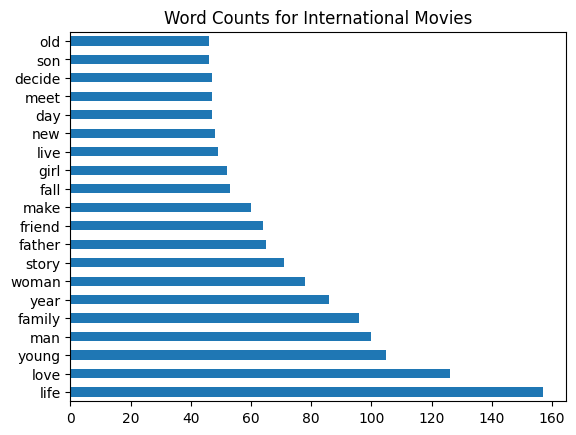

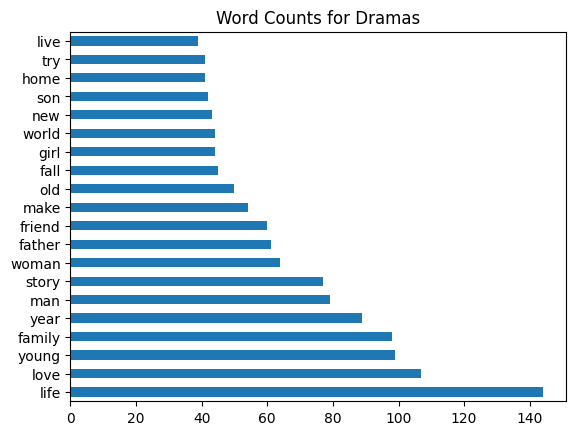

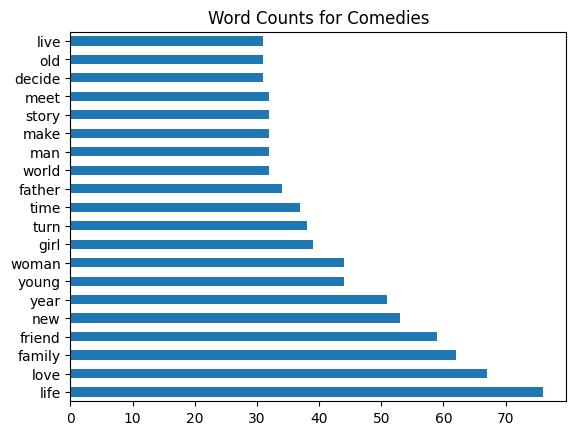

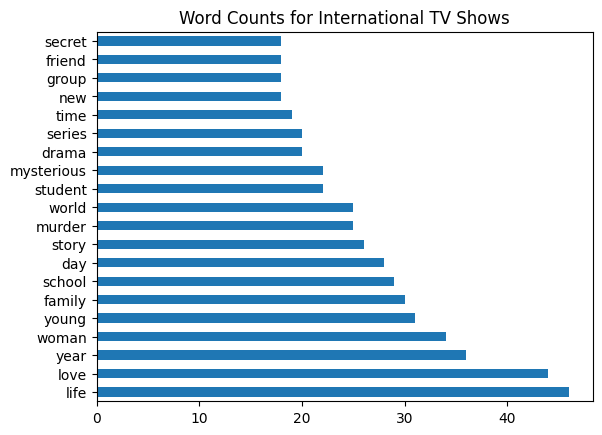

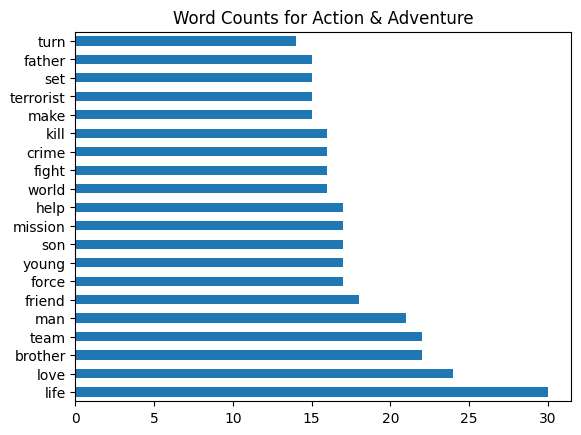

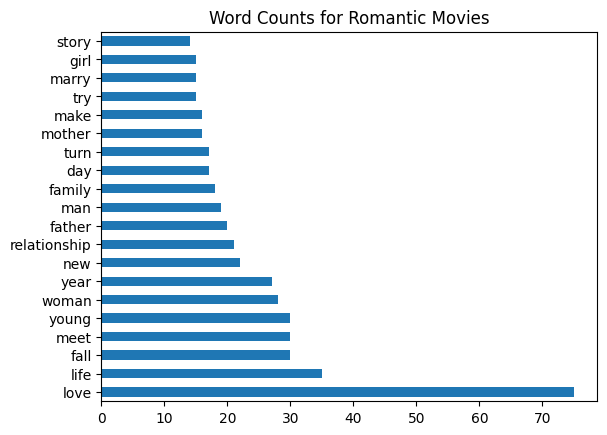

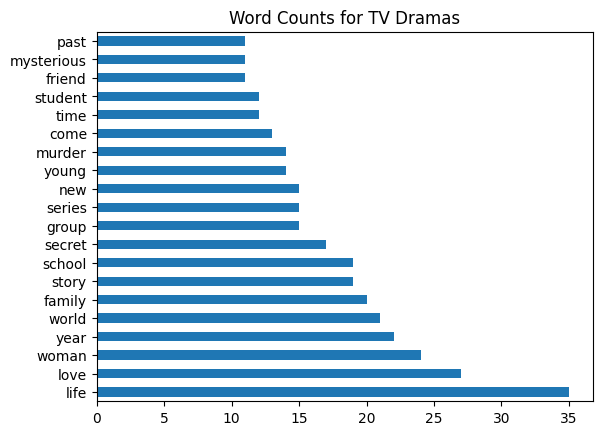

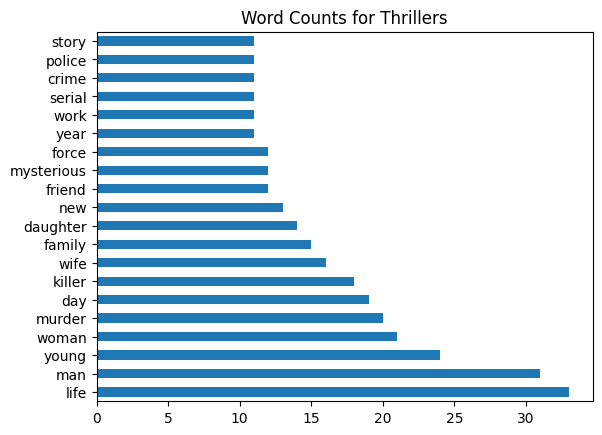

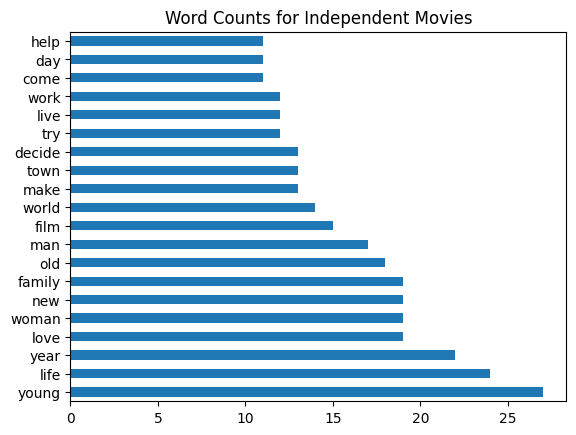

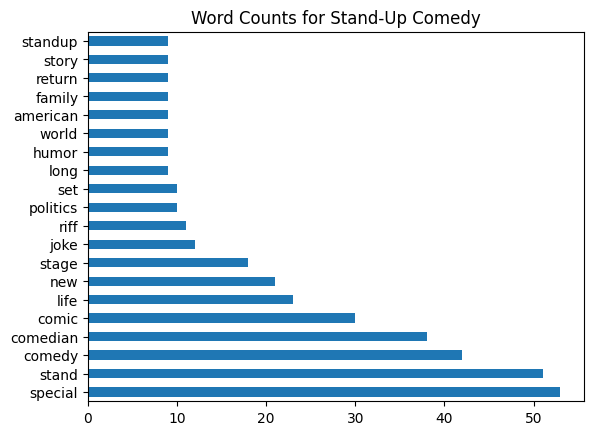

In [28]:
for genre in frequent_genres:
  genre_series = word_genre_matrix_df[genre]
  genre_series.sort_values(ascending=False).iloc[:20].plot.barh(title=f'Word Counts for {genre}')

  plt.show()

The graphs for international movies and dramas are very similar. This may indicate that the set of international movies overlaps with the set of movies that are dramas.

In [29]:
word_genre_matrix.shape

(41, 9261)

# Fit a Naive Bayes Classifier

The purpose of the Naive Bayes classifier is to learn a condensed representation of the descriptions by mapping each description into vector that represents the probabilities that a description belongs to each genre. Using the `MultinomialNB.predict_proba()` method, the output is a vector where each entry is within [0, 1] and the sum of all elements is equal to 1.

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
model_clf = MultinomialNB()
model_clf.fit(word_genre_matrix, genre_bag_of_description_words_df['genre'].values)

MultinomialNB()

In [32]:
movie_word_matrix = vectorizer.transform(X_train['description_x'])
movie_genre_weights = model_clf.predict_proba(movie_word_matrix)

movie_genre_weights.shape

(1733, 41)

# Fit a Linear Regression Model

After mapping from descriptions to genre probabilities, the genre probabilities are used as features to predict IMDb scores. This trains a model that maps genre probabilities into a prediction of the IMDb score. Combined with the Naive Bayes classifier, the sequence of two models maps film descriptions into a prediction of the IMDb score.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model_rgn = LinearRegression()
model_rgn.fit(X=movie_genre_weights, y=y_train)

LinearRegression()

In [35]:
model_rgn.score(X=movie_genre_weights, y=y_train)

0.1931470379836463

# Preliminary Results Discussion

The R2 score indicates a low linear relationship between the vector of genre probabilities and IMDb score, but this does not rule out nonlinear relationships. Future plans include finding better representations of descriptions that are complex enough to capture the relationship but simple enough to interpret.

Additionally, 5-Fold cross validation will be used to validate the choice of feature representations and hyperparameters of potential models, and the holdout testing data will be used to evaluate the final model.